# Understanding Amsterdam City Airbnb Listings

In this project i look at amsterdam city airbnb data listings and using CRISP-DM process to analyze the data.

CRISP-DM (Cross-Industry Standard Process for Data Mining) consists of:

    1) Business Understanding

    2) Data Understanding

    3) Data Preparation/ Wrangling

    4) Data Modeling

    5) Data Evaluation

    6) Deployment
    
## Data

The data can be found [link](http://insideairbnb.com/get-the-data.html). The files of interest for the current analysis are: 

- detailed_listings: Detailed listings for Amsterdam. 
- calenar: Detailed calendar data for listings in Amsterdam.
- listings: Summarized listings information for Amsterdam. 

## Questions of Interest

1) Is it more expansive to book a listing during the high seasons

2) Most expansive month to visit amsterdam?

3) Most expansive and least expansive Neighbourhood in Amsterdam?

4) what are the attributes associated with the price of a listing?


This project is part of term 2 of udacity data science nanodegree. 

## Data Understanding

In this section i will try to understand each dataset and get a feeling about the different columns provided

In [629]:
# import python libraries
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

%matplotlib inline

In [2]:
# read the listings data

listings_df = pd.read_csv('data/listings.csv')
listings_df.head()

id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1  20168       Studio with private bathroom in the centre 1    59484   
2  25428                Lovely apt in City Centre (Jordaan)    56142   
3  27886  Romantic, stylish B&B houseboat in canal district    97647   
4  28658                Cosy guest room near city centre -1   123414   

   host_name  neighbourhood_group                           neighbourhood  \
0     Daniel                  NaN  Oostelijk Havengebied - Indische Buurt   
1  Alexander                  NaN                            Centrum-Oost   
2       Joan                  NaN                            Centrum-West   
3       Flip                  NaN                            Centrum-West   
4    Michele                  NaN                           Bos en Lommer   

   latitude  longitude        room_type  price  minimum_nights  \
0  52.36575    4.94142     Private room     59               3   
1  52.36509    4.89354  Entire home/apt     80               1   
2  52.37311    4.88367  Entire home/apt    125              14   
3  52.38673    4.89208     Private room    150               2   
4  52.37534    4.85729     Private room     65               3   

   number_of_reviews last_review  reviews_per_month  \
0                255  2019-04-17               2.07   
1                267  2019-04-24               2.39   
2                  2  2019-02-16               0.13   
3                189  2019-05-04               2.12   
4                453  2019-04-22               4.15   

   calculated_host_listings_count  availability_365  
0                               1                12  
1                               2               166  
2                               2               116  
3                               1               102  
4                               1               236

In [3]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Data columns (total 16 columns):
id                                19619 non-null int64
name                              19583 non-null object
host_id                           19619 non-null int64
host_name                         19605 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     19619 non-null object
latitude                          19619 non-null float64
longitude                         19619 non-null float64
room_type                         19619 non-null object
price                             19619 non-null int64
minimum_nights                    19619 non-null int64
number_of_reviews                 19619 non-null int64
last_review                       17403 non-null object
reviews_per_month                 17403 non-null float64
calculated_host_listings_count    19619 non-null int64
availability_365                  19619 non-null int64
dt

In [8]:
# columns with no missing values
set(listings_df.columns[listings_df.isnull().mean()== 0])

{'availability_365',
 'calculated_host_listings_count',
 'host_id',
 'id',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood',
 'number_of_reviews',
 'price',
 'room_type'}

In [7]:
# columns with more than 75% missing values
set(listings_df.columns[listings_df.isnull().mean()>0.750])

{'neighbourhood_group'}

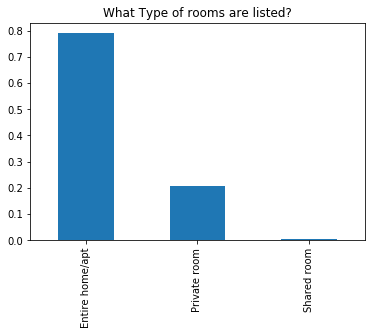

In [9]:
# explore the toom type options
room_type = listings_df.room_type.value_counts()

(room_type/listings_df.shape[0]).plot(kind="bar");
plt.title("What Type of rooms are listed?");

In [12]:
room_type

Entire home/apt    15496
Private room        4056
Shared room           67
Name: room_type, dtype: int64

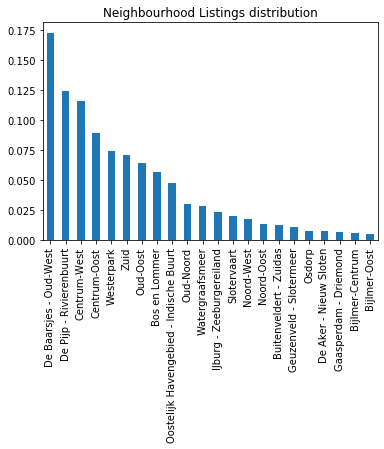

In [10]:
# neighbourhood distribution
neighbourhood = listings_df.neighbourhood.value_counts()

(neighbourhood/listings_df.shape[0]).plot(kind="bar");
plt.title("Neighbourhood Listings distribution");

In [11]:
neighbourhood

De Baarsjes - Oud-West                    3386
De Pijp - Rivierenbuurt                   2433
Centrum-West                              2263
Centrum-Oost                              1747
Westerpark                                1459
Zuid                                      1389
Oud-Oost                                  1260
Bos en Lommer                             1108
Oostelijk Havengebied - Indische Buurt     929
Oud-Noord                                  588
Watergraafsmeer                            556
IJburg - Zeeburgereiland                   460
Slotervaart                                386
Noord-West                                 334
Noord-Oost                                 256
Buitenveldert - Zuidas                     234
Geuzenveld - Slotermeer                    217
Osdorp                                     143
De Aker - Nieuw Sloten                     139
Gaasperdam - Driemond                      127
Bijlmer-Centrum                            105
Bijlmer-Oost 

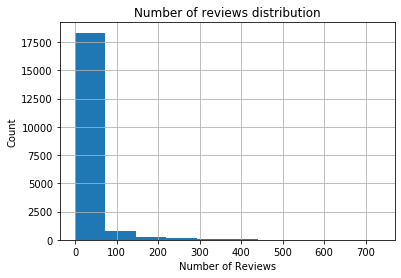

In [18]:
# num of reviews distribution 
listings_df.number_of_reviews.hist();
plt.title('Number of reviews distribution');
plt.xlabel('Number of Reviews');
plt.ylabel('Count');

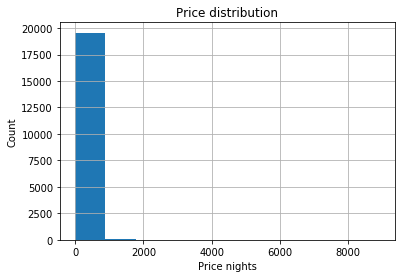

In [25]:
# price distribution
listings_df.price.hist();
plt.title('Price distribution');
plt.xlabel('Price nights');
plt.ylabel('Count');

In [24]:
listings_df[['reviews_per_month','number_of_reviews','calculated_host_listings_count','price','minimum_nights','availability_365']].describe()

reviews_per_month  number_of_reviews  calculated_host_listings_count  \
count       17403.000000       19619.000000                    19619.000000   
mean            0.984953          23.071359                        4.687650   
std             1.306500          47.138906                       22.341708   
min             0.000000           0.000000                        1.000000   
25%             0.240000           3.000000                        1.000000   
50%             0.540000           9.000000                        1.000000   
75%             1.090000          23.000000                        1.000000   
max            12.050000         733.000000                      202.000000   

              price  minimum_nights  availability_365  
count  19619.000000    19619.000000      19619.000000  
mean     155.636475        3.373923         49.822162  
std      148.324430       14.206782         92.067263  
min        0.000000        1.000000          0.000000  
25%       99.000000        2.000000          0.000000  
50%      129.000000        2.000000          0.000000  
75%      180.000000        3.000000         49.000000  
max     8915.000000     1001.000000        365.000000

This summarized listing csv contains 19619 rows and 16 columns that cover the listing details such as id, name, location(longitude, latitude),room type and price and host related information though it is limited to host name and id.

Insights:

-  Number of neighbourhood is 22 with De Baarsjes - Oud-West to have the most listings
- 80% of the listings are entire apt.
- minimum nights has an average of 3.37 and a maximum value of 1001 which is an indication of error
- availability_365 is 49 days
- price is long tailed and is skewed to the right with a mean price of 156 and a max of 8915.

Things to consider in the wrangling phase:
- neighbourhood_group is null for all the values so this column will be dropped
- last_review is a string instead of a date 

In [4]:
# calendar data
calender_data = pd.read_csv("data/calendar.csv")
calender_data.head()

listing_id        date available    price adjusted_price  minimum_nights  \
0      141708  2019-05-06         f  $145.00        $145.00               3   
1        2818  2019-05-06         t   $69.00         $69.00               3   
2        2818  2019-05-07         f   $59.00         $59.00               3   
3        2818  2019-05-08         f   $59.00         $59.00               3   
4        2818  2019-05-09         f   $59.00         $59.00               3   

   maximum_nights  
0              30  
1              15  
2              15  
3              15  
4              15

In [57]:
calender_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160935 entries, 0 to 7160934
Data columns (total 7 columns):
listing_id        7160935 non-null int64
date              7160935 non-null datetime64[ns]
available         7160935 non-null object
price             7160224 non-null object
adjusted_price    7160224 non-null object
minimum_nights    7160935 non-null int64
maximum_nights    7160935 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 382.4+ MB


In [26]:
# columns with no missing values
set(calender_data.columns[calender_data.isnull().mean()== 0])

{'available', 'date', 'listing_id', 'maximum_nights', 'minimum_nights'}

In [27]:
# columns with more than 75% missing values
set(calender_data.columns[calender_data.isnull().mean()>= 0.75])

set()

In [30]:
calender_data[['minimum_nights','maximum_nights']].describe()

minimum_nights  maximum_nights
count    7.160935e+06    7.160935e+06
mean     3.491891e+00    6.159900e+02
std      1.431747e+01    5.415066e+02
min      1.000000e+00    1.000000e+00
25%      2.000000e+00    2.100000e+01
50%      2.000000e+00    1.124000e+03
75%      3.000000e+00    1.125000e+03
max      1.001000e+03    9.999000e+03

This detailed calendar csv contains 7 columns that has a listing and availability for a certain date .
Things to consider in the wrangling phase:
- date is a string and needs to be changed into date format
- price is set to a string 
- the max value for a minimum night for a listing is 1000 
- we have some missing price items in the calander data
- drop the adjusted price and the missing values for price

In [559]:
# detailed listing 
detailed_listings_df = pd.read_csv('data/detailed_listings.csv')
detailed_listings_df.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20190506125736   2019-05-06   
1  20168  https://www.airbnb.com/rooms/20168  20190506125736   2019-05-06   
2  25428  https://www.airbnb.com/rooms/25428  20190506125736   2019-05-06   
3  27886  https://www.airbnb.com/rooms/27886  20190506125736   2019-05-06   
4  28658  https://www.airbnb.com/rooms/28658  20190506125736   2019-05-06   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1       Studio with private bathroom in the centre 1   
2                Lovely apt in City Centre (Jordaan)   
3  Romantic, stylish B&B houseboat in canal district   
4                Cosy guest room near city centre -1   

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  Cozy studio on your own private floor, 100% in...   
2                                                NaN   
3  Stylish and romantic houseboat on fantastic hi...   
4  2 beds guest room in Amsterdam West near Erasm...   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  For those who like all facets of city life. In...   
2  This nicely furnished, newly renovated apt  is...   
3  For a romantic couple: A beautifully restored ...   
4  Cosy small but comfortable guest room with twi...   

                                         description experiences_offered  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none   
1  Cozy studio on your own private floor, 100% in...                none   
2  This nicely furnished, newly renovated apt  is...                none   
3  Stylish and romantic houseboat on fantastic hi...                none   
4  2 beds guest room in Amsterdam West near Erasm...                none   

                               neighborhood_overview  ... instant_bookable  \
0  Indische Buurt ("Indies Neighborhood") is a ne...  ...                t   
1  Located just in between famous central canals....  ...                f   
2                                                NaN  ...                f   
3         Central, quiet, safe, clean and beautiful.  ...                t   
4  The listing is located in Amsterdam west, betw...  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             t                                t   

   calculated_host_listings_count  \
0                               1   
1                               2   
2                               2   
3                               1   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            1   
2                                            2   
3                                            0   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            0   
3                                            1   
4                                            1   

   calculated_hos

In [561]:
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 15.9+ MB


In [562]:
# columns with no missing values
set(detailed_listings_df.columns[detailed_listings_df.isnull().mean()== 0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'country',
 'country_code',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_business_travel_ready',
 'is_location_exact',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'maximum_maximum_nights',
 'maximum_minimum_nights',
 'maximum_nights',
 'maximum_nights_avg_ntm',
 'minimum_maximum_nights',
 'minimum_minimum_nights',
 'minimum_nights',
 'minimum_nights_avg_ntm',
 'neighbourhood_cleansed',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'picture_url',
 'price',
 'property_type',
 'requi

In [563]:
# columns with more than 75 missing values
set(detailed_listings_df.columns[detailed_listings_df.isnull().mean()>= 0.75])

{'host_acceptance_rate',
 'license',
 'medium_url',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'thumbnail_url',
 'weekly_price',
 'xl_picture_url'}

In [564]:
# columns with more than 100% missing values
set(detailed_listings_df.columns[detailed_listings_df.isnull().mean()>= 1])

{'host_acceptance_rate',
 'medium_url',
 'neighbourhood_group_cleansed',
 'thumbnail_url',
 'xl_picture_url'}

In [565]:
# columns in this data set
detailed_listings_df.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


This detailed listing csv contains 19619 rows and 106 columns that cover the listing details such as id, name, location(longitude, latitude),room type and price and host related information though it is limited to host name and id.

Things to consider in the wrangling phase:
- decide on columns of interest
- remove columns with more than 75% missing columns
- observe the issues from listings dataset

## Data Preparation/ Wrangling
In this step i will handle missing values and categorical variables.

### calendar dataset
- change the date column from string to datetime format
- price is set to a string and is need to fixing the format


In [566]:
# change the date column to a datetime 
calender_data['date'] = pd.to_datetime(calender_data.date)
calender_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160224 entries, 0 to 7160934
Data columns (total 8 columns):
listing_id        7160224 non-null int64
date              7160224 non-null datetime64[ns]
available         7160224 non-null object
price             7160224 non-null float64
minimum_nights    7160224 non-null int64
maximum_nights    7160224 non-null int64
month             7160224 non-null int64
year              7160224 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 811.7+ MB


In [40]:
# list the the price values 
calender_data.price.value_counts()

$150.00      357317
$120.00      280917
$100.00      277481
$200.00      211445
$125.00      191663
$110.00      178482
$130.00      161669
$140.00      159371
$250.00      159193
$90.00       146904
$80.00       134985
$175.00      134838
$95.00       132856
$99.00       128858
$160.00      128818
$180.00      111280
$75.00       106229
$85.00       103158
$135.00       88478
$300.00       85986
$115.00       83849
$149.00       83170
$70.00        81471
$145.00       69848
$225.00       65279
$79.00        64127
$105.00       61682
$170.00       59926
$60.00        59362
$129.00       59102
              ...  
$1,127.00         1
$1,629.00         1
$1,017.00         1
$1,394.00         1
$1,148.00         1
$1,337.00         1
$1,386.00         1
$1,246.00         1
$815.00           1
$928.00           1
$1,135.00         1
$2,051.00         1
$1,124.00         1
$1,526.00         1
$1,728.00         1
$1,194.00         1
$891.00           1
$1,023.00         1
$1,130.00         1


In [60]:
# drop the missing values in price and drop 
calender_data = calender_data.dropna(subset=['price'], axis = 0)
calender_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160224 entries, 0 to 7160934
Data columns (total 7 columns):
listing_id        7160224 non-null int64
date              7160224 non-null datetime64[ns]
available         7160224 non-null object
price             7160224 non-null object
adjusted_price    7160224 non-null object
minimum_nights    7160224 non-null int64
maximum_nights    7160224 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 437.0+ MB


In [349]:
def clean_price(x):
    """
    clean the price column by eliminate the $ and , 
    from the string and return a float to be stored in the column
    """
    try:
        if ',' in x:
            x = x.replace(',','')
        x = x[1:]
        return float(str(x))
    except:
        return x

In [45]:
calender_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160935 entries, 0 to 7160934
Data columns (total 7 columns):
listing_id        int64
date              datetime64[ns]
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 382.4+ MB


In [64]:
# to clean the price and convert it into a float 
calender_data['price'] = calender_data.price.apply(lambda x: clean_price(x))
calender_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160224 entries, 0 to 7160934
Data columns (total 7 columns):
listing_id        7160224 non-null int64
date              7160224 non-null datetime64[ns]
available         7160224 non-null object
price             7160224 non-null float64
adjusted_price    7160224 non-null object
minimum_nights    7160224 non-null int64
maximum_nights    7160224 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 437.0+ MB


In [65]:
# drop the adjusted price column 
calender_data = calender_data.drop('adjusted_price', axis = 1)
calender_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160224 entries, 0 to 7160934
Data columns (total 6 columns):
listing_id        7160224 non-null int64
date              7160224 non-null datetime64[ns]
available         7160224 non-null object
price             7160224 non-null float64
minimum_nights    7160224 non-null int64
maximum_nights    7160224 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 382.4+ MB


In [66]:
calender_data.describe()

listing_id         price  minimum_nights  maximum_nights
count  7.160224e+06  7.160224e+06    7.160224e+06    7.160224e+06
mean   1.649205e+07  1.658032e+02    3.491965e+00    6.159701e+02
std    9.404979e+06  1.591237e+02    1.431818e+01    5.415068e+02
min    2.818000e+03  9.000000e+00    1.000000e+00    1.000000e+00
25%    8.692855e+06  1.000000e+02    2.000000e+00    2.100000e+01
50%    1.643351e+07  1.390000e+02    2.000000e+00    1.124000e+03
75%    2.355223e+07  1.950000e+02    3.000000e+00    1.125000e+03
max    3.445983e+07  8.915000e+03    1.001000e+03    9.999000e+03

In [88]:
# add month and year column to the calender dataset
calender_data['month'], calender_data['year'] = calender_data.date.dt.month, calender_data.date.dt.year
calender_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160224 entries, 0 to 7160934
Data columns (total 8 columns):
listing_id        7160224 non-null int64
date              7160224 non-null datetime64[ns]
available         7160224 non-null object
price             7160224 non-null float64
minimum_nights    7160224 non-null int64
maximum_nights    7160224 non-null int64
month             7160224 non-null int64
year              7160224 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 811.7+ MB


In [89]:
calender_data.describe()

listing_id         price  minimum_nights  maximum_nights  \
count  7.160224e+06  7.160224e+06    7.160224e+06    7.160224e+06   
mean   1.649205e+07  1.658032e+02    3.491965e+00    6.159701e+02   
std    9.404979e+06  1.591237e+02    1.431818e+01    5.415068e+02   
min    2.818000e+03  9.000000e+00    1.000000e+00    1.000000e+00   
25%    8.692855e+06  1.000000e+02    2.000000e+00    2.100000e+01   
50%    1.643351e+07  1.390000e+02    2.000000e+00    1.124000e+03   
75%    2.355223e+07  1.950000e+02    3.000000e+00    1.125000e+03   
max    3.445983e+07  8.915000e+03    1.001000e+03    9.999000e+03   

              month          year  
count  7.160224e+06  7.160224e+06  
mean   6.517877e+00  2.019342e+03  
std    3.454994e+00  4.745284e-01  
min    1.000000e+00  2.019000e+03  
25%    4.000000e+00  2.019000e+03  
50%    7.000000e+00  2.019000e+03  
75%    1.000000e+01  2.020000e+03  
max    1.200000e+01  2.020000e+03

### 1) Is it more expansive to book a listing during the high seasons?

Here we are Comparing the availabilty of the listing to the listing price by checking the availability of the listing in each month

In [99]:
calender_data.available.value_counts()

f    6166077
t     994147
Name: available, dtype: int64

In [103]:
not_available_mask = calender_data.available=='f'
available_mask = calender_data.available=='t'


month
1     0.082581
2     0.077916
3     0.082923
4     0.080009
5     0.086833
6     0.085393
7     0.083978
8     0.084617
9     0.082971
10    0.084159
11    0.083085
12    0.085536
Name: listing_id, dtype: float64

In [142]:
calender_data.groupby(['month','available']).mean()['price']

month  available
1      f            157.364359
       t            206.784402
2      f            157.644863
       t            205.617698
3      f            159.015177
       t            203.998502
4      f            160.730906
       t            204.621838
5      f            156.373312
       t            244.478405
6      f            155.494361
       t            246.970660
7      f            151.199948
       t            233.669161
8      f            152.307078
       t            235.834327
9      f            157.272275
       t            236.178876
10     f            156.661322
       t            225.894503
11     f            158.235158
       t            218.369191
12     f            158.974681
       t            224.296263
Name: price, dtype: float64

In [125]:
# number of available homes 
avaliable_home_count = calender_data.groupby('date').count()[['price']]
avaliable_home_count = avaliable_home_count.rename({'price':"total_available_houses"}, axis=1)

In [123]:
avaliable_home_count.total_available_houses.value_counts()

19618    192
19616    173
Name: total_available_houses, dtype: int64

### 2) Comparing the availabilty of the listing to the listing price

In [147]:
avaliable_count_daily = calender_data[available_mask].groupby('date').count()[['price']]
avaliable_count_daily = avaliable_count_daily.rename({"price":"total_available_houses"},axis='columns')

In [148]:
average_price_daily = calender_data[available_mask].groupby('date').mean()[['price']]
# change column name
average_price_daily = average_price_daily.rename({"price":"average_prices"},axis='columns')

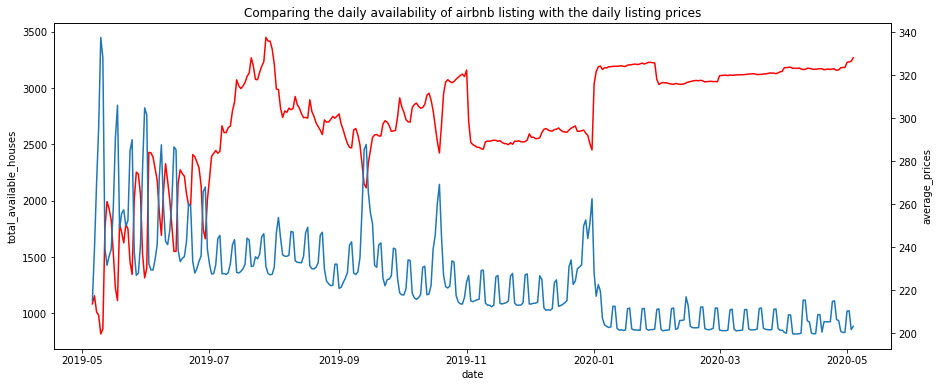

In [158]:
# plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count_daily.index,y = 'total_available_houses', 
                  data = avaliable_count_daily,color="r",legend=False)

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price_daily.index,y = 'average_prices',
             data=average_price_daily,ax=ax2,linestyle=':', legend=False)
ax.set_title('Comparing the daily availability of airbnb listing with the daily listing prices');

Conclusion:

- we can see from the above figure how the lower the available house number the higher the average daily price is.
- we can see peak in prices in the period between july and sept 2019
- availability stabilize from Jan 2020 - May 2020.
- there is a clear trend and seasonality in the daily average prices. 

### 2) Most expansive months to visit amsterdam in?

Comparing the monthly availability of a listing and average monthly prices.

In [150]:
average_price_monthly = calender_data[available_mask].groupby('month').mean()[['price']]
average_price_monthly = average_price_monthly.rename({"price":"monthly_average_prices"},axis='columns')

In [152]:
avaliable_count_monthly = calender_data[available_mask].groupby('month').count()[['price']]
avaliable_count_monthly = avaliable_count_monthly.rename({"price":"total_available_houses_monthly"},axis='columns')

Text(0.5, 1.0, 'Comparing the monthly availability of airbnb listing with the monthly listing prices')

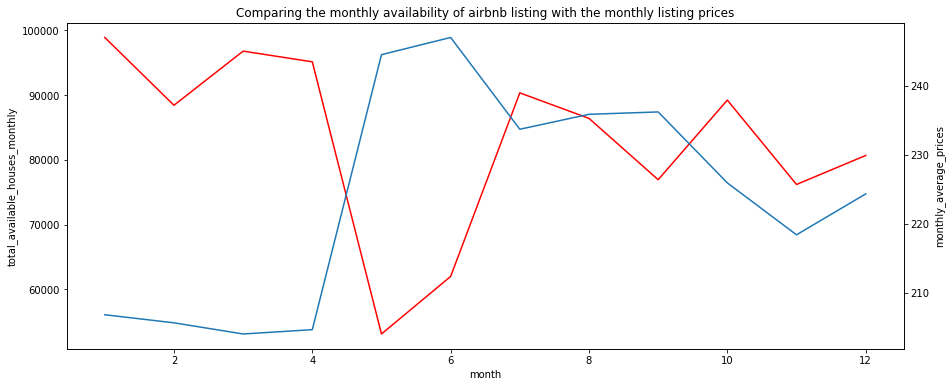

In [157]:
# plot total available houses and average monthly prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_count_monthly.index,y = 'total_available_houses_monthly', 
                  data = avaliable_count_monthly,color="r",legend=False)
ax.set_xticks
ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price_monthly.index,y = 'monthly_average_prices',
             data=average_price_monthly,ax=ax2,linestyle=':', legend=False)
ax.set_title('Comparing the monthly availability of airbnb listing with the monthly listing prices');

Conclusion:

- we can see from the above figure how the lower the available house number the higher the average monthly price is.
- we can see peak in prices in the period between May and June months due to the inavailablity of listings.
- the cheapest months are in the period between Feb and April

### listings datasets 
I will be using the summarized dataset to answer the 3rd question about the least and most expansive neighbourhoods in amsterdam so the cleaning and handling of categorical variables

cleaning and handling categorical variables:
- neighbourhood_group is null for all the values so this column will be dropped.
- last_review, first_review, host_since is a string instead of a date

Before we dig into cleaning we will start by answering the following question:

### 3) Most expansive and least expansive Neighbourhood in Amsterdam?

In [163]:
# group the listings by neighbourood and get the average price
listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

neighbourhood
Centrum-Oost                              195.408128
Centrum-West                              193.269112
Zuid                                      183.510439
IJburg - Zeeburgereiland                  168.804348
De Pijp - Rivierenbuurt                   159.344842
Oud-Noord                                 158.238095
Buitenveldert - Zuidas                    157.311966
De Baarsjes - Oud-West                    146.568222
Westerpark                                145.346127
Watergraafsmeer                           141.836331
Oud-Oost                                  140.574603
De Aker - Nieuw Sloten                    133.812950
Oostelijk Havengebied - Indische Buurt    129.431647
Geuzenveld - Slotermeer                   126.345622
Noord-West                                123.961078
Noord-Oost                                120.500000
Bos en Lommer                             118.727437
Slotervaart                               117.349741
Osdorp                          

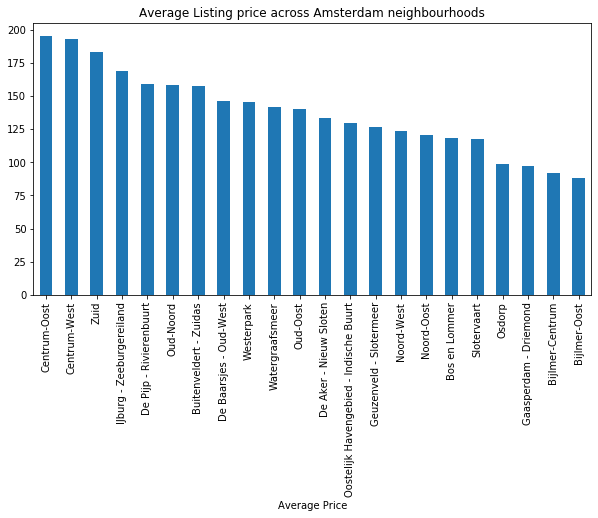

In [166]:
# grouped neighbourhood 
(listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)).plot(kind="bar", figsize=(10,5));
plt.title("Average Listing price across Amsterdam neighbourhoods");
plt.xlabel('Neighbourhood');
plt.xlabel('Average Price');

Insights:

- The Most Expansive neighbourhood is Centrum-Oost followed by Centrum-West which is reasonable since it is the city center of amsterdam city while the cheapest listings are in Bijlmer-Centrum and Bijlmer-Oost which is part of Amsterdam-Southeast part. 

- The prices in the center is around double the prices in the southeast and westernmost neighbourhoods of Amsterdam. 

### Data wrangling and cleaning for the listings dataset

I will have two sections one for the detailed wrangling and one for all the steps at once.

- Drop redundant columns: some of the columns are present twice such as neighbourhood and neighbourhood_cleansed 
- Handle the missing values by removing columns containing more than 75% missing values. 
- Handle Categorical variables by enconding them so that they are useful for the training. 

#### Detailed Wrangling
#### 1) Remove redundent columns

In [567]:
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 15.9+ MB


In [568]:
# drop redundent columns
detailed_listings_df.drop(columns = 'neighbourhood' , inplace = True, axis = 1)
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Columns: 105 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(61)
memory usage: 15.7+ MB


#### 2) Handle missing values in columns 

In [569]:
# columns with more than 75% missing values
cols_with_missing_val = list(set(detailed_listings_df.columns[detailed_listings_df.isnull().mean()>0.750]))
cols_with_missing_val

['medium_url',
 'weekly_price',
 'thumbnail_url',
 'host_acceptance_rate',
 'license',
 'xl_picture_url',
 'neighbourhood_group_cleansed',
 'monthly_price',
 'square_feet']

In [570]:
# drop columns 
detailed_listings_df.drop(columns =cols_with_missing_val , inplace = True, axis = 1)
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Data columns (total 96 columns):
id                                              19619 non-null int64
listing_url                                     19619 non-null object
scrape_id                                       19619 non-null int64
last_scraped                                    19619 non-null object
name                                            19583 non-null object
summary                                         19109 non-null object
space                                           14428 non-null object
description                                     19495 non-null object
experiences_offered                             19619 non-null object
neighborhood_overview                           13220 non-null object
notes                                           8910 non-null object
transit                                         13547 non-null object
access                                          11947 

In [620]:
detailed_listings_df[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','review_scores_rating']].describe()


review_scores_rating  review_scores_accuracy  \
count           17180.00000            17170.000000   
mean               94.95681                9.689051   
std                 6.64449                0.688677   
min                20.00000                2.000000   
25%                93.00000               10.000000   
50%                97.00000               10.000000   
75%               100.00000               10.000000   
max               100.00000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               17172.000000           17161.000000   
mean                    9.473795               9.739059   
std                     0.864510               0.636291   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 17168.000000            17162.000000   
mean                      9.788735                9.453910   
std                       0.601485                0.713079   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  review_scores_rating  
count         17163.000000           17180.00000  
mean              9.176310              94.95681  
std               0.812747               6.64449  
min               2.000000              20.00000  
25%               9.000000              93.00000  
50%               9.000000              97.00000  
75%              10.000000             100.00000  
max              10.000000             100.00000

We can nptice that the rating and review scores is not providing a wide range of values

#### 3) Handling text fields 

- Add binary columns to signify the existance of a value in the following columns: (transit, space, summary, description, neighborhood_overview, host_about) with a 1 if it contains a value and 0 otherwise.

- fix columns with t and f to binary: instant bookable and require_guest_phone_verification

In [571]:
# create new columns

detailed_listings_df['has_transit_info'] = detailed_listings_df.transit.apply(lambda x: 0 if pd.isnull(x) else 1)
detailed_listings_df['has_description_info'] = detailed_listings_df.description.apply(lambda x: 0 if pd.isnull(x) else 1)
detailed_listings_df['has_summary_info'] = detailed_listings_df.summary.apply(lambda x: 0 if pd.isnull(x) else 1)
detailed_listings_df['has_neighborhood_info'] = detailed_listings_df.neighborhood_overview.apply(lambda x: 0 if pd.isnull(x) else 1)
detailed_listings_df['has_host_info'] = detailed_listings_df.host_about.apply(lambda x: 0 if pd.isnull(x) else 1)
detailed_listings_df.host_is_superhost = detailed_listings_df.host_is_superhost.apply(lambda x: 0 if pd.isnull(x) else 1)

# fix t and f columns
detailed_listings_df['instant_bookable'] =  detailed_listings_df['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)
detailed_listings_df['require_guest_phone_verification'] =  detailed_listings_df['require_guest_phone_verification'].apply(lambda x: 1 if x=='t' else 0)
detailed_listings_df['require_guest_profile_picture'] =  detailed_listings_df['require_guest_profile_picture'].apply(lambda x: 1 if x=='t' else 0)
detailed_listings_df['host_identity_verified'] =  detailed_listings_df['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)
detailed_listings_df.host_has_profile_pic = detailed_listings_df.host_has_profile_pic.apply(lambda x: 1 if x=='t' else 0)

In [572]:
#check the previous 
detailed_listings_df[detailed_listings_df.transit.isnull()][['transit','has_transit_info']].head()

transit  has_transit_info
5      NaN                 0
6      NaN                 0
8      NaN                 0
9      NaN                 0
16     NaN                 0

In [573]:
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Columns: 101 entries, id to has_host_info
dtypes: float64(17), int64(32), object(52)
memory usage: 15.1+ MB


#### 4) Drop  irrelant or redundent columns:
I will start by inspecting the object or string columns 

In [574]:
detailed_listings_df.select_dtypes(include=['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'street', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'jurisdiction_names', 'is_business_travel_ready',
       'cancellation_policy'],
      dtype='object')

In [575]:
columns_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'country_code', 'country', 'picture_url', 'host_url', 'host_thumbnail_url','notes', 
'host_picture_url','transit', 'space', 'description', 'summary', 'neighborhood_overview', 'name', 'latitude', 'longitude'
, 'is_location_exact', 'host_about','is_business_travel_ready','jurisdiction_names','experiences_offered','access', 'interaction', 
'house_rules', 'amenities','calendar_last_scraped','requires_license', 'smart_location', 'host_verifications', 'street',
'host_verifications', 'calendar_updated','has_availability', 'city', 'state','host_id','zipcode','market','host_location','host_name','host_neighbourhood']

detailed_listings_df.drop(columns=columns_to_drop, inplace=True)
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Data columns (total 59 columns):
id                                              19619 non-null int64
host_since                                      19605 non-null object
host_response_time                              11357 non-null object
host_response_rate                              11357 non-null object
host_is_superhost                               19619 non-null int64
host_listings_count                             19605 non-null float64
host_total_listings_count                       19605 non-null float64
host_has_profile_pic                            19619 non-null int64
host_identity_verified                          19619 non-null int64
neighbourhood_cleansed                          19619 non-null object
property_type                                   19619 non-null object
room_type                                       19619 non-null object
accommodates                                    19619

In [576]:
detailed_listings_df.select_dtypes(include=['object']).columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',
       'price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'first_review', 'last_review', 'cancellation_policy'],
      dtype='object')

In [577]:
numerical_columns = detailed_listings_df.select_dtypes(include=['float', 'int']).columns
numerical_columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listi

#### 5) Fix the data type

- fix the data type to number of days till day for first_review, last_review, host_since columns instead of a string
- fix the price,security_deposit, extra_people and cleaning_fee into int instead of a string
- fix the host_response rate to int instead of string

In [578]:
def days_between(date):
    """
    return the number of days from today to the given date
    """
    try:
        date_format = "%Y-%m-%d"
        NOW = datetime.now()
        d = datetime.strptime(date, date_format)
        return abs((NOW - d).days)
    except:
        return date

In [579]:
detailed_listings_df.first_review.head()

0    2009-03-30
1    2010-03-02
2    2018-01-21
3    2012-01-09
4    2010-05-16
Name: first_review, dtype: object

In [580]:
detailed_listings_df.first_review.apply(lambda x : days_between(x)).head()

0    3737.0
1    3400.0
2     518.0
3    2722.0
4    3325.0
Name: first_review, dtype: float64

In [581]:
detailed_listings_df['first_review'] = detailed_listings_df.first_review.apply(lambda x : days_between(x))
detailed_listings_df['last_review'] = detailed_listings_df['last_review'].apply(lambda x : days_between(x))
detailed_listings_df['host_since'] = detailed_listings_df['host_since'].apply(lambda x : days_between(x))
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Data columns (total 59 columns):
id                                              19619 non-null int64
host_since                                      19605 non-null float64
host_response_time                              11357 non-null object
host_response_rate                              11357 non-null object
host_is_superhost                               19619 non-null int64
host_listings_count                             19605 non-null float64
host_total_listings_count                       19605 non-null float64
host_has_profile_pic                            19619 non-null int64
host_identity_verified                          19619 non-null int64
neighbourhood_cleansed                          19619 non-null object
property_type                                   19619 non-null object
room_type                                       19619 non-null object
accommodates                                    1961

In [582]:
# fix the price data type into float instead of a string
detailed_listings_df.price = detailed_listings_df.price.apply(lambda x: clean_price(x))

In [583]:
detailed_listings_df.extra_people = detailed_listings_df.extra_people.apply(lambda x: clean_price(x))
detailed_listings_df.security_deposit = detailed_listings_df.security_deposit.apply(lambda x: clean_price(x))
detailed_listings_df.cleaning_fee = detailed_listings_df.cleaning_fee.apply(lambda x: clean_price(x))

In [584]:
def clean_response_rate(x):
    """
    clean the response rate column by eliminating the % and
    from the string and return a float to be stored in the column
    """
    try:
        return float(str( x[:-1]))/100
    except:
        return x

In [585]:
detailed_listings_df.host_response_rate = detailed_listings_df.host_response_rate.apply(lambda x: clean_response_rate(x))

In [586]:
detailed_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19619 entries, 0 to 19618
Data columns (total 59 columns):
id                                              19619 non-null int64
host_since                                      19605 non-null float64
host_response_time                              11357 non-null object
host_response_rate                              11357 non-null float64
host_is_superhost                               19619 non-null int64
host_listings_count                             19605 non-null float64
host_total_listings_count                       19605 non-null float64
host_has_profile_pic                            19619 non-null int64
host_identity_verified                          19619 non-null int64
neighbourhood_cleansed                          19619 non-null object
property_type                                   19619 non-null object
room_type                                       19619 non-null object
accommodates                                    196

In [587]:
detailed_listings_df.select_dtypes(include=['object']).columns

Index(['host_response_time', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'bed_type', 'cancellation_policy'],
      dtype='object')

#### 6) Handling categorical Variables

In [588]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis =1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [589]:
cat_cols_lst = detailed_listings_df.select_dtypes(include=['object'])
cat_cols_lst

host_response_time                  neighbourhood_cleansed  \
0          within an hour  Oostelijk Havengebied - Indische Buurt   
1      within a few hours                            Centrum-Oost   
2          within an hour                            Centrum-West   
3          within an hour                            Centrum-West   
4      within a few hours                           Bos en Lommer   
5          within an hour                            Centrum-West   
6          within an hour                            Centrum-West   
7                     NaN                                    Zuid   
8          within an hour                            Centrum-West   
9          within an hour                            Centrum-West   
10         within an hour                            Centrum-West   
11           within a day                            Centrum-West   
12     within a few hours                                    Zuid   
13         within an hour                            Centrum-Oost   
14                    NaN                 De Pijp - Rivierenbuurt   
15           within a day                  De Baarsjes - Oud-West   
16     within a few hours                            Centrum-West   
17     within a few hours                            Centrum-West   
18         within an hour                              Westerpark   
19         within an hour                            Centrum-West   
20           within a day                           Bos en Lommer   
21         within an hour                 De Pijp - Rivierenbuurt   
22         within an hour                              Westerpark   
23         within an hour                 De Pijp - Rivierenbuurt   
24         within an hour                            Centrum-Oost   
25           within a day                 De Pijp - Rivierenbuurt   
26                    NaN                           Bos en Lommer   
27         within an hour                            Centrum-Oost   
28           within a day                  De Baarsjes - Oud-West   
29     within a few hours                                    Zuid   
...                   ...                                     ...   
19589      within an hour                            Centrum-West   
19590      within an hour                  De Baarsjes - Oud-West   
19591      within an hour                  De Baarsjes - Oud-West   
19592      within an hour                            Centrum-West   
19593      within an hour                  De Baarsjes - Oud-West   
19594                 NaN                  De Baarsjes - Oud-West   
19595                 NaN                            Centrum-Oost   
19596  within a few hours                         Watergraafsmeer   
19597                 NaN                  Buitenveldert - Zuidas   
19598      within an hour                                    Zuid   
19599                 NaN                  De Baarsjes - Oud-West   
19600                 NaN                            Centrum-Oost   
19601      within an hour                              Westerpark   
19602                 NaN                               Oud-Noord   
19603                 NaN                            Centrum-Oost   
19604        within a day                IJburg - Zeeburgereiland   
19605      within an hour                  De Baarsjes - Oud-West   
19606                 NaN                              Westerpark   
19607                 NaN                              Westerpark   
19608      within an hour                                  Osdorp   
19609                 NaN                              Westerpark   
19610                 NaN  Oostelijk Havengebied - Indische Buurt   
19611                 NaN                         Watergraafsmeer   
19612        within a day                               Oud-Noord   
19613  within a few hours                            Centrum-Oost   
19614                 NaN  Oostelijk Havengebied - Indische Buurt   
19615

In [590]:
# print the shape of the dataframe before handeling the categorical variables
print(detailed_listings_df.shape)

detailed_listings_df_categorized = create_dummy_df(detailed_listings_df, cat_cols_lst, dummy_na=False) 

print(detailed_listings_df_categorized.shape)


(19619, 59)
(19619, 117)


### Cleaning and Transformation 

In [591]:
def clean_calendar_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for calendar 
    dataframe 
    
    INPUT: Listings DataFrame
    OUTPUT: Trimmed and cleaned calendar DataFrame
    """
    # change the date column to a datetime 
    df['date'] = pd.to_datetime(df.date)    
    
    # drop the missing values in price and drop 
    df = df.dropna(subset=['price'], axis = 0)
    
    # to clean the price and convert it into a float 
    df['price'] = df.price.apply(lambda x: clean_price(x))
    
    # drop the adjusted price column 
    df = df.drop('adjusted_price', axis = 1)
    
    # add month and year column to the calender dataset
    df['month'], df['year'] = df.date.dt.month, df.date.dt.year

    return df

In [677]:
def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

In [678]:
def clean_listings_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for detailed airbnb listings 
    dataframe 
    
    INPUT: Listings DataFrame
    OUTPUT: Trimmed and cleaned detailed airbnb listings DataFrame
    """
    # drop neighbourhood column since it is redundent 
    df.drop(columns = 'neighbourhood' , inplace = True, axis = 1)
    
    # drop columns with more than 75% missing values
    cols_with_missing_val = list(set(df.columns[df.isnull().mean()>0.750]))
    df.drop(columns=cols_with_missing_val,inplace=True,axis = 1)
    
    # create new column for existing information regarding transit, description, neighbourhood, host,summary
    df['has_transit_info'] = df.transit.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_description_info'] = df.description.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_summary_info'] = df.summary.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_neighborhood_info'] = df.neighborhood_overview.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_host_info'] = df.host_about.apply(lambda x: 0 if pd.isnull(x) else 1)
    df.host_is_superhost = df.host_is_superhost.apply(lambda x: 0 if pd.isnull(x) else 1)

    # convert columns containing t and f into binary columns 
    df['instant_bookable'] =  df['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)
    df['require_guest_phone_verification'] =  df['require_guest_phone_verification'].apply(lambda x: 1 if x=='t' else 0)
    df['require_guest_profile_picture'] =  df['require_guest_profile_picture'].apply(lambda x: 1 if x=='t' else 0)
    df['host_identity_verified'] =  df['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)
    df.host_has_profile_pic = df.host_has_profile_pic.apply(lambda x: 1 if x=='t' else 0)

    # Drop  irrelant or redundent columns
    columns_to_drop = ['id','listing_url', 'scrape_id', 'last_scraped', 'country_code', 'country', 'picture_url', 'host_url', 'host_thumbnail_url','notes', 
    'host_picture_url','transit', 'space', 'description', 'summary', 'neighborhood_overview', 'name', 'latitude', 'longitude'
    , 'is_location_exact', 'host_about','is_business_travel_ready','jurisdiction_names','experiences_offered','access', 'interaction', 
    'house_rules', 'amenities','calendar_last_scraped','requires_license', 'smart_location', 'host_verifications', 'street',
    'host_verifications', 'calendar_updated','has_availability', 'city', 'state','host_id','zipcode','market','host_location','host_name','host_neighbourhood']

    df.drop(columns=columns_to_drop, inplace=True)
    
    # fix columns datatypes
    
    #fix the data type to num of days passed for first_review, last_review, host_since columns
    df['first_review'] = df.first_review.apply(lambda x : days_between(x))
    df['last_review'] = df['last_review'].apply(lambda x : days_between(x))
    df['host_since'] = df['host_since'].apply(lambda x : days_between(x))

    # fix the price,security_deposit, extra_people and cleaning_fee into int instead of a string
    df.price = df.price.apply(lambda x: clean_price(x))
    df.extra_people = df.extra_people.apply(lambda x: clean_price(x))
    df.security_deposit = df.security_deposit.apply(lambda x: clean_price(x))
    df.cleaning_fee = df.cleaning_fee.apply(lambda x: clean_price(x))

    #fix the host_response rate to int instead of string
    df.host_response_rate = df.host_response_rate.apply(lambda x: clean_response_rate(x))

    #Handling categorical Variables
    cat_cols_lst = df.select_dtypes(include=['object'])
    
    df = create_dummy_df(df, cat_cols_lst, dummy_na=False) 
    
    # drop rows with missing values
    df.dropna(inplace = True)
    
    # delete the columns with only one value 
    df = drop_constant_column(df)
    return df

In [679]:
original_calendar_df = pd.read_csv('data/calendar.csv')
calendar_cleaned_df = clean_calendar_data(original_calendar_df)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [680]:
original_listings_df = pd.read_csv('data/detailed_listings.csv')
detailed_listings_df_cleaned = clean_listings_data(original_listings_df)
detailed_listings_df_cleaned.info()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 0 to 19539
Columns: 110 entries, host_since to cancellation_policy_super_strict_60
dtypes: float64(23), int64(28), uint8(59)
memory usage: 3.5 MB


#### Features scaling and transformation
Is needed so that all the features are scaled and within the same range since clustering depends on the features distances to create the clusters.

In [681]:
detailed_listings_df_cleaned.isnull().sum(axis=1).describe()

count    7716.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

In [682]:
# apply the scaling to numerical columns only 

numerical_columns = detailed_listings_df_cleaned.select_dtypes(include=['float', 'int']).columns

#create a new dateframe for the scaled data
listings_df_scaled = pd.DataFrame(data = detailed_listings_df_cleaned)

# define the scaler and scale numerical values
scaler = MinMaxScaler()
listings_df_scaled[numerical_columns] = scaler.fit_transform(detailed_listings_df_cleaned[numerical_columns])

# Shows scaled data
listings_df_scaled.head()

host_since  host_response_rate  host_listings_count  \
0    1.000000                 1.0             0.001253   
2    0.890617                 1.0             0.002506   
3    0.858735                 1.0             0.001253   
4    0.845775                 1.0             0.001253   
8    0.829964                 1.0             0.001253   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                   0.001253                   1.0                     0.0   
2                   0.002506                   1.0                     0.0   
3                   0.001253                   1.0                     1.0   
4                   0.001253                   1.0                     1.0   
8                   0.001253                   1.0                     0.0   

   accommodates  bathrooms  bedrooms     beds  ...  room_type_Private room  \
0        0.0625   0.100000  0.083333  0.06250  ...                       1   
2        0.1250   0.066667  0.083333  0.03125  ...                       0   
3        0.0625   0.066667  0.083333  0.03125  ...                       1   
4        0.0625   0.066667  0.083333  0.06250  ...                       1   
8        0.0625   0.066667  0.083333  0.03125  ...                       0   

   room_type_Shared room  bed_type_Couch  bed_type_Futon  \
0                      0               0               0   
2                      0               0               0   
3                      0               0               0   
4                      0               0               0   
8                      0               0               1   

   bed_type_Pull-out Sofa  bed_type_Real Bed  cancellation_policy_moderate  \
0                       0                  1                             0   
2                       0                  1                             0   
3                       0                  1                             0   
4                       0                  1                             1   
8                       0                  0                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
2                                                1   
3                                                1   
4                                                0   
8                                                1   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                    0                                    0  
2                                    0                                    0  
3                                    0                                    0  
4                                    0                                    0  
8                                    0                                    0  

[5 rows x 110 columns]

In [685]:
listings_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 0 to 19539
Columns: 110 entries, host_since to cancellation_policy_super_strict_60
dtypes: float64(51), uint8(59)
memory usage: 3.5 MB


### Data Modeling
For this part i will use KMeans clustering to listings into different clusters to understand the popularity of a listing. 
- the elbow method will be used to determine the number of clusters for the data.

In [687]:
#### KMeans 
def get_kmeans_score(data, cluster):
    """
    Perform k-mean clustering on provided data and return the score for the given clusters 
    num
    """
    # instantiate kmeans
    kmeans = KMeans(cluster)
    #fit model
    model = kmeans.fit(data)
    #get score of the model
    score = np.abs(model.score(data))
    print('Score: {}'.format(score))
    return score    

In [688]:
# Over a number of different cluster counts
# run k-means clustering on the data and return the score
clusters = list(range(2,25))
scores = []
for cluster in clusters:
    print('Number of cluster {}'.format(cluster))
    scores.append(get_kmeans_score(listings_df_scaled, cluster))

Number of cluster 2
Score: 32083.986784778557
Number of cluster 3
Score: 30311.039438166208
Number of cluster 4
Score: 29117.514123098746
Number of cluster 5
Score: 27844.316780034438
Number of cluster 6
Score: 27349.715454329693
Number of cluster 7
Score: 26485.03631566679
Number of cluster 8
Score: 25895.07394078764
Number of cluster 9
Score: 25458.773987489574
Number of cluster 10
Score: 25045.718327119732
Number of cluster 11
Score: 24578.132942067736
Number of cluster 12
Score: 24322.8663035741
Number of cluster 13
Score: 23882.67311133826
Number of cluster 14
Score: 23589.08092957443
Number of cluster 15
Score: 23301.55283290056
Number of cluster 16
Score: 23222.448048021866
Number of cluster 17
Score: 22860.95827414551
Number of cluster 18
Score: 22680.948588117026
Number of cluster 19
Score: 22597.139088656942
Number of cluster 20
Score: 22255.291140418263
Number of cluster 21
Score: 22038.925776851407
Number of cluster 22
Score: 21844.310146110805
Number of cluster 23
Score: 2

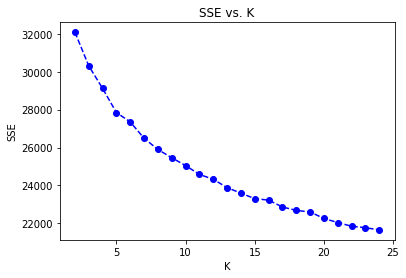

In [689]:
# Investigate the change in within-cluster distance across number of clusters.
plt.plot(clusters, scores, linestyle ='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [763]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general listings data.
from sklearn.cluster import KMeans
choosen_k = 10
kmeans = KMeans(choosen_k)
model_kmeans = kmeans.fit(listings_df_scaled)
labels_listings = model_kmeans.transform(listings_df_scaled)

listings_kmeans = model_kmeans.predict(listings_df_scaled)
listings_kmeans

array([3, 6, 3, ..., 4, 4, 4], dtype=int32)

### Data Evalution
For this part i will use KMeans clustering to listings into different clusters to understand the popularity of a listing 

In [764]:
# add the cluster column to the dataset 
listings_df_scaled['Cluster'] = pd.Series(listings_kmeans, index=listings_df_scaled.index)
listings_df_scaled.head()

host_since  host_response_rate  host_listings_count  \
0    1.000000                 1.0             0.001253   
2    0.890617                 1.0             0.002506   
3    0.858735                 1.0             0.001253   
4    0.845775                 1.0             0.001253   
8    0.829964                 1.0             0.001253   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                   0.001253                   1.0                     0.0   
2                   0.002506                   1.0                     0.0   
3                   0.001253                   1.0                     1.0   
4                   0.001253                   1.0                     1.0   
8                   0.001253                   1.0                     0.0   

   accommodates  bathrooms  bedrooms     beds  ...  room_type_Shared room  \
0        0.0625   0.100000  0.083333  0.06250  ...                      0   
2        0.1250   0.066667  0.083333  0.03125  ...                      0   
3        0.0625   0.066667  0.083333  0.03125  ...                      0   
4        0.0625   0.066667  0.083333  0.06250  ...                      0   
8        0.0625   0.066667  0.083333  0.03125  ...                      0   

   bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  \
0               0               0                       0                  1   
2               0               0                       0                  1   
3               0               0                       0                  1   
4               0               0                       0                  1   
8               0               1                       0                  0   

   cancellation_policy_moderate  \
0                             0   
2                             0   
3                             0   
4                             1   
8                             0   

   cancellation_policy_strict_14_with_grace_period  \
0                                                1   
2                                                1   
3                                                1   
4                                                0   
8                                                1   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  \
0                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   
8                                    0                                    0   

   Cluster  
0        3  
2        6  
3        3  
4        9  
8        6  

[5 rows x 111 columns]

In [765]:
# group the data by different clusters 
listings_grouped_by_clusters = listings_df_scaled.groupby('Cluster').mean()
listings_grouped_by_clusters.head()

host_since  host_response_rate  host_listings_count  \
Cluster                                                        
0          0.432494            0.967280             0.067677   
1          0.415239            0.969181             0.002983   
2          0.441598            0.893343             0.003476   
3          0.412218            0.981633             0.003219   
4          0.334925            0.971165             0.006750   

         host_total_listings_count  host_has_profile_pic  \
Cluster                                                    
0                         0.067677              0.998912   
1                         0.002983              1.000000   
2                         0.003476              1.000000   
3                         0.003219              1.000000   
4                         0.006750              1.000000   

         host_identity_verified  accommodates  bathrooms  bedrooms      beds  \
Cluster                                                                        
0                      0.306855      0.113439   0.075988  0.117247  0.053353   
1                      0.438554      0.087500   0.073494  0.084538  0.047892   
2                      0.453370      0.127020   0.074977  0.129040  0.061692   
3                      0.387755      0.088557   0.069679  0.082604  0.046556   
4                      0.297809      0.115662   0.074469  0.107155  0.054376   

         ...  room_type_Private room  room_type_Shared room  bed_type_Couch  \
Cluster  ...                                                                  
0        ...                0.093580               0.001088        0.000000   
1        ...                0.857831               0.000000        0.000000   
2        ...                0.148661               0.001847        0.000000   
3        ...                0.865889               0.005831        0.000000   
4        ...                0.371514               0.002988        0.000996   

         bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  \
Cluster                                                              
0              0.003264                0.007617           0.988030   
1              0.002410                0.019277           0.978313   
2              0.000923                0.009234           0.988920   
3              0.005831                0.000000           0.991254   
4              0.000000                0.003984           0.995020   

         cancellation_policy_moderate  \
Cluster                                 
0                            0.710555   
1                            0.836145   
2                            0.094183   
3                            0.002915   
4                            0.089641   

         cancellation_policy_strict_14_with_grace_period  \
Cluster                                                    
0                                               0.288357   
1                                               0.004819   
2                                               0.704524   
3                                               0.985423   
4                                               0.690239   

         cancellation_policy_super_strict_30  \
Cluster                                        
0                                   0.000000   
1                                   0.007229   
2                                   0.000000   
3                                   0.000000   
4                                   0.002988   

         cancellation_policy_super_strict_60  
Cluster                                       
0                                   0.000000  
1                                   0.009639  
2                                   0.000923  
3                                   0.000000  
4                                   0.008964  

[5 rows x 110 columns]

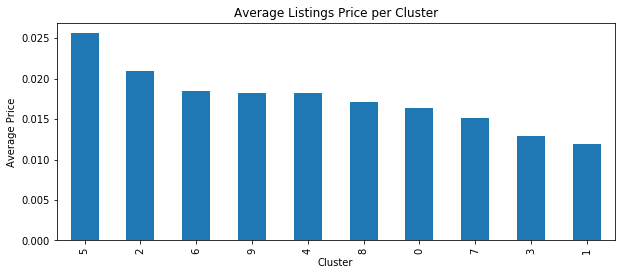

In [766]:
avg_price_per_cluster = listings_grouped_by_clusters.price.sort_values(ascending=False)
avg_price_per_cluster.plot.bar(figsize=(10,4));
plt.title('Average Listings Price per Cluster');
plt.ylabel('Average Price');

In [769]:
# clusters column mean value for 
clusters_mean = listings_grouped_by_clusters.mean()
clusters_mean

host_since                                         0.408100
host_response_rate                                 0.946936
host_listings_count                                0.010570
host_total_listings_count                          0.010570
host_has_profile_pic                               0.999365
host_identity_verified                             0.381375
accommodates                                       0.119601
bathrooms                                          0.076122
bedrooms                                           0.118417
beds                                               0.059252
price                                              0.017501
security_deposit                                   0.046854
cleaning_fee                                       0.077521
guests_included                                    0.039715
extra_people                                       0.052757
minimum_nights                                     0.001864
maximum_nights                          

In [805]:
# in order to compare the different clusters i will subtract the mean
# and the value in each cluster

# display the percentage for each cluster and the average mean 
clusters_differences_in_mean = ((listings_grouped_by_clusters- clusters_mean)*100/clusters_mean)
clusters_differences_in_mean

host_since  host_response_rate  host_listings_count  \
Cluster                                                        
0          5.977388            2.148324           540.261158   
1          1.749328            2.349085           -71.775924   
2          8.208299           -5.659706           -67.116172   
3          1.009097            3.664055           -69.549623   
4        -17.930576            2.558667           -36.142213   
5          4.394313            2.897688           -60.519188   
6         -1.400229           -1.215857           -81.368477   
7        -14.650773            2.141182             4.262908   
8          3.717088          -11.012583           -79.112980   
9          8.926065            2.129145           -78.939489   

         host_total_listings_count  host_has_profile_pic  \
Cluster                                                    
0                       540.261158             -0.045349   
1                       -71.775924              0.063534   
2                       -67.116172              0.063534   
3                       -69.549623              0.063534   
4                       -36.142213              0.063534   
5                       -60.519188              0.063534   
6                       -81.368477             -0.044995   
7                         4.262908              0.063534   
8                       -79.112980             -0.223592   
9                       -78.939489             -0.067268   

         host_identity_verified  accommodates  bathrooms   bedrooms  \
Cluster                                                               
0                    -19.539791     -5.152703  -0.175223  -0.988257   
1                     14.992853    -26.840208  -3.452100 -28.609949   
2                     18.877755      6.202810  -1.503985   8.970338   
3                      1.672869    -25.956562  -8.463381 -30.242888   
4                    -21.911868     -3.293332  -2.171500  -9.510910   
5                     12.839158     60.707783  26.035988  54.616407   
6                     -4.444451      2.076840   0.687318   6.474836   
7                    -33.462830     -7.612426  -4.525765  -3.546048   
8                     11.354171     -1.708868  -2.997182   0.359225   
9                     19.622135      1.576667  -3.434169   2.477247   

              beds  ...  room_type_Private room  room_type_Shared room  \
Cluster             ...                                                  
0        -9.955491  ...              -70.018120             -37.693034   
1       -19.172560  ...              174.838664            -100.000000   
2         4.118774  ...              -52.370793               5.743494   
3       -21.426413  ...              177.420313             233.878146   
4        -8.228254  ...               19.028524              71.095922   
5        72.810352  ...              -50.404370              77.275858   
6         5.653959  ...              -40.926333            -100.000000   
7       -11.775196  ...              -44.373409            -100.000000   
8        -8.062370  ...              -56.331653            -100.000000   
9        -3.962801  ...              -56.862823              49.699613   

         bed_type_Couch  bed_type_Futon  bed_type_Pull-out Sofa  \
Cluster                                                           
0                -100.0       40.661565               20.113673   
1                -100.0        3.829702              203.984760   
2                -100.0      -60.212995               45.606735   
3                -100.0      151.249715             -100.000000   
4                 900.0     -100.000000              -37.174464   
5                -100.0     -100.000000              -18.631530   
6                -100.0      133.673135              -48.690208   
7                -100.0     -100.000000             -100.000000   
8                -100.0      -38.178872               -9.502385   
9                -100.0       68.977750 

In [802]:
clusters_differences_in_mean_transposed = clusters_differences_in_mean.T
clusters_differences_in_mean_transposed

Cluster                                                   0           1  \
host_since                                         5.977388    1.749328   
host_response_rate                                 2.148324    2.349085   
host_listings_count                              540.261158  -71.775924   
host_total_listings_count                        540.261158  -71.775924   
host_has_profile_pic                              -0.045349    0.063534   
host_identity_verified                           -19.539791   14.992853   
accommodates                                      -5.152703  -26.840208   
bathrooms                                         -0.175223   -3.452100   
bedrooms                                          -0.988257  -28.609949   
beds                                              -9.955491  -19.172560   
price                                             -6.265011  -31.927420   
security_deposit                                   1.086324  -46.689063   
cleaning_fee                                       6.698559  -39.355747   
guests_included                                  -22.553875  -17.080799   
extra_people                                       2.117630  -19.646403   
minimum_nights                                    -6.962016  -43.963302   
maximum_nights                                   -73.083819  -15.596685   
minimum_minimum_nights                             8.373869  -50.399435   
maximum_minimum_nights                            14.230295  -30.973145   
minimum_maximum_nights                           -72.868798  -21.823303   
maximum_maximum_nights                           -73.078134  -15.422851   
minimum_nights_avg_ntm                             9.657576  -41.380394   
maximum_nights_avg_ntm                           -72.971897  -19.389390   
availability_30                                  -68.491879   16.979363   
availability_60                                  -67.995251   27.382624   
availability_90                                  -64.105515   31.941296   
availability_365                                 -68.367609   66.720709   
number_of_reviews                                -60.962301  218.274216   
number_of_reviews_ltm                            -61.792630  209.444535   
first_review                                      -2.438006   25.229556   
...                                                     ...         ...   
property_type_Cabin                             -100.000000  309.382963   
property_type_Camper/RV                         -100.000000 -100.000000   
property_type_Campsite                          -100.000000 -100.000000   
property_type_Casa particular (Cuba)            -100.000000 -100.000000   
property_type_Chalet                            -100.000000 -100.000000   
property_type_Condominium                       -100.000000   67.570074   
property_type_Cottage                           -100.000000 -100.000000   
property_type_Dome house                        -100.000000 -100.000000   
property_type_Guest suite                       -100.000000  355.846907   
property_type_Guesthouse                        -100.000000  123.015248   
property_type_Hostel                            -100.000000  900.000000   
property_type_Hotel                             -100.000000  514.445025   
property_type_House                              -88.327382   32.935243   
property_type_Houseboat                         -100.000000   18.055340   
property_type_Loft                               -91.551271  -15.807903   
property_type_Other                             -100.000000  179.844350   
property_type_Serviced apartment                -100.000000 -100.000000   
property_type_Tiny house                        -100.000000  589.603590   
property_type_Townhouse                         -100.000000   75.855729   
property_type_Villa                             -100.000000  144.624189   
room_type_Private room                           -70.018120  174.838664   
room_type_Shared room    

In [801]:
clusters_differences_in_mean['price']

Cluster
0    -6.265011
1   -31.927420
2    19.516532
3   -26.312129
4     4.056090
5    46.282727
6     5.838389
7   -13.249143
8    -2.365824
9     4.425790
Name: price, dtype: float64

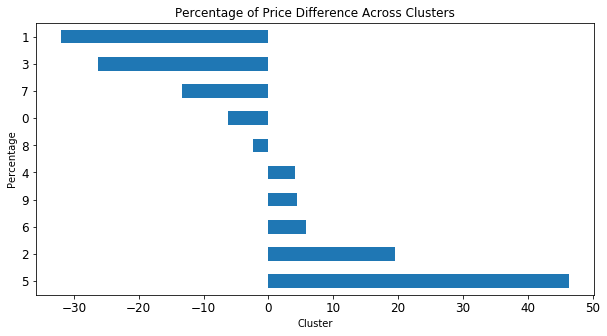

In [840]:
clusters_differences_in_mean[['price']].sort_values(ascending=False, by='price').plot(kind='barh', figsize= [10,5], fontsize =12, legend=False);
plt.title('Percentage of Price Difference Across Clusters');
plt.xlabel('Cluster');
plt.ylabel('Percentage');

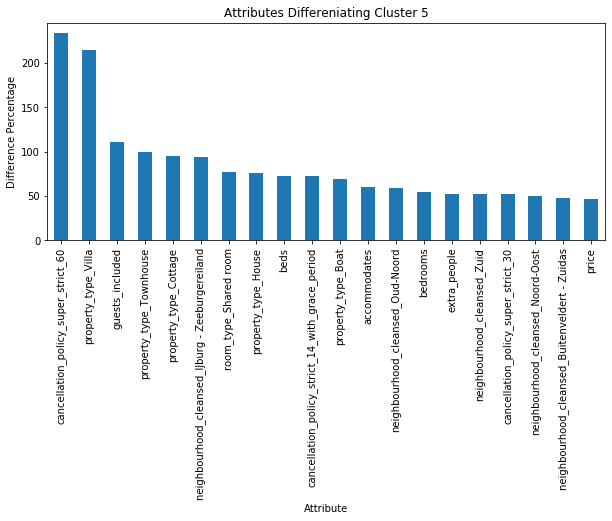

In [822]:
# investigating the most cluster with the highest and lowest price 
# cluster 5 highest difference score compared to the other clusters
# cluster 1 had the lowest price

cluster5 = clusters_differences_in_mean_transposed[5].sort_values(ascending=False).head(20)
cluster5.plot.bar(figsize=(10,4))
plt.title('Attributes Differeniating Cluster 5');
plt.ylabel('Difference Percentage');
plt.xlabel('Attribute');

In [823]:
cluster5

cancellation_policy_super_strict_60                233.647774
property_type_Villa                                214.300428
guests_included                                    111.168567
property_type_Townhouse                             99.974015
property_type_Cottage                               95.805207
neighbourhood_cleansed_IJburg - Zeeburgereiland     94.172757
room_type_Shared room                               77.275858
property_type_House                                 75.543572
beds                                                72.810352
cancellation_policy_strict_14_with_grace_period     72.479196
property_type_Boat                                  69.828890
accommodates                                        60.707783
neighbourhood_cleansed_Oud-Noord                    58.908918
bedrooms                                            54.616407
extra_people                                        52.031662
neighbourhood_cleansed_Zuid                         51.989967
cancella

Cluster 5
- the highest difference is for super strict cancellation policy
- property type: villa, cottage, house, boat, townhouse
- detailed fees are listed such as extra beds, guests, 
- neighbourhoods: Zeeburgereiland, Oud-Noord, Zuid,Noord-Oost, Zuidas
- it had the highest price difference

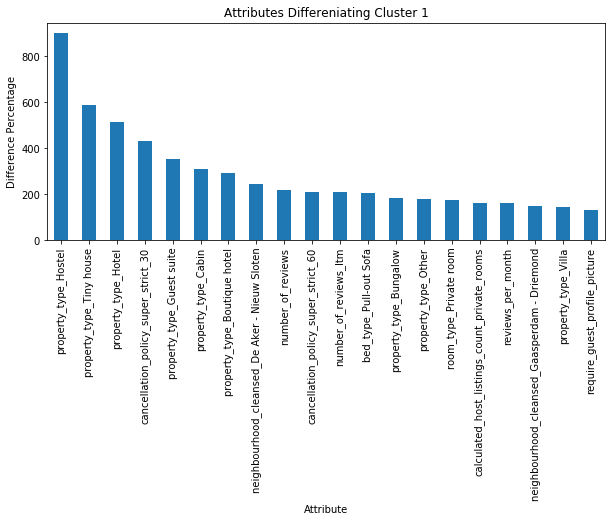

In [815]:
# cheapest price cluster 1
cluster1 = clusters_differences_in_mean_transposed[1].sort_values(ascending=False).head(20)
cluster1.plot.bar(figsize=(10,4))
plt.title('Attributes Differeniating Cluster 1');
plt.ylabel('Difference Percentage');
plt.xlabel('Attribute');

In [824]:
cluster1

property_type_Hostel                             900.000000
property_type_Tiny house                         589.603590
property_type_Hotel                              514.445025
cancellation_policy_super_strict_30              432.001990
property_type_Guest suite                        355.846907
property_type_Cabin                              309.382963
property_type_Boutique hotel                     291.424436
neighbourhood_cleansed_De Aker - Nieuw Sloten    247.046213
number_of_reviews                                218.274216
cancellation_policy_super_strict_60              211.618981
number_of_reviews_ltm                            209.444535
bed_type_Pull-out Sofa                           203.984760
property_type_Bungalow                           184.346051
property_type_Other                              179.844350
room_type_Private room                           174.838664
calculated_host_listings_count_private_rooms     162.198438
reviews_per_month                       

Cluster 1:
- property type mostly hostels,Tiny house, hotels, Guest suite, Boutique hotel  
- strict cancellation policy 30
- neighbourhoods: De Aker - Nieuw Sloten, Driemond
- require guest profile picture

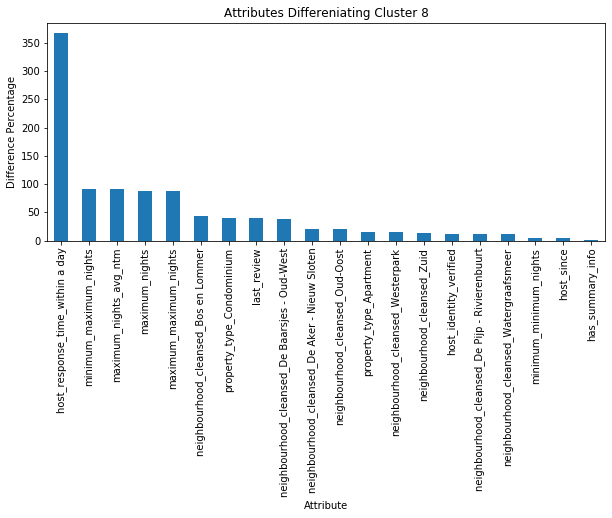

In [829]:
# Medium range price cluster 8
cluster8 = clusters_differences_in_mean_transposed[8].sort_values(ascending=False).head(20)
cluster8.plot.bar(figsize=(10,4))

plt.title('Attributes Differeniating Cluster 8');
plt.ylabel('Difference Percentage');
plt.xlabel('Attribute');

In [830]:
cluster8

host_response_time_within a day                   366.451388
minimum_maximum_nights                             91.923118
maximum_nights_avg_ntm                             90.467579
maximum_nights                                     88.064803
maximum_maximum_nights                             87.983214
neighbourhood_cleansed_Bos en Lommer               43.843023
property_type_Condominium                          39.681798
last_review                                        39.157341
neighbourhood_cleansed_De Baarsjes - Oud-West      37.855236
neighbourhood_cleansed_De Aker - Nieuw Sloten      20.536735
neighbourhood_cleansed_Oud-Oost                    20.202645
property_type_Apartment                            15.068028
neighbourhood_cleansed_Westerpark                  14.716982
neighbourhood_cleansed_Zuid                        13.436414
host_identity_verified                             11.354171
neighbourhood_cleansed_De Pijp - Rivierenbuurt     11.222707
neighbourhood_cleansed_W

Cluster 8:
- property type mostly hostels,Tiny house, hotels, Guest suite, Boutique hotel  
- the highest difference is for super strict cancellation policy
- neighbourhoods: De Baarsjes - Oud-West, De Aker - Nieuw Sloten
- mostly for the host response within a day

In [845]:
# comparing the 3 clusters 
comparsion_columns = list(set(cluster5.index[:10].tolist() + cluster1.index[:10].tolist() + cluster8.index[:10].tolist()))
clusters_differences_in_mean_transposed[[5,8,1]].loc[comparsion_columns].sort_values(ascending=False, by=5)

Cluster                                                   5           8  \
cancellation_policy_super_strict_60              233.647774 -100.000000   
property_type_Villa                              214.300428 -100.000000   
guests_included                                  111.168567  -13.059173   
property_type_Townhouse                           99.974015  -16.957259   
property_type_Cottage                             95.805207 -100.000000   
neighbourhood_cleansed_IJburg - Zeeburgereiland   94.172757   -1.837276   
room_type_Shared room                             77.275858 -100.000000   
property_type_House                               75.543572   -5.458735   
beds                                              72.810352   -8.062370   
cancellation_policy_strict_14_with_grace_period   72.479196    0.285931   
cancellation_policy_super_strict_30               51.895993 -100.000000   
property_type_Hotel                               31.576205 -100.000000   
last_review                                       -1.442710   39.157341   
neighbourhood_cleansed_De Aker - Nieuw Sloten    -13.298138   20.536735   
property_type_Condominium                        -13.880395   39.681798   
neighbourhood_cleansed_De Baarsjes - Oud-West    -14.020335   37.855236   
neighbourhood_cleansed_Bos en Lommer             -16.431280   43.843023   
number_of_reviews                                -48.314156  -59.721106   
property_type_Guest suite                        -49.798372  -84.490554   
host_response_time_within a day                  -60.081483  366.451388   
minimum_maximum_nights                           -63.871054   91.923118   
maximum_nights_avg_ntm                           -64.142420   90.467579   
maximum_maximum_nights                           -64.595354   87.983214   
maximum_nights                                   -64.780442   88.064803   
property_type_Boutique hotel                     -72.060347  -22.314136   
property_type_Cabin                             -100.000000 -100.000000   
property_type_Hostel                            -100.000000 -100.000000   
property_type_Tiny house                        -100.000000 -100.000000   

Cluster                                                   1  
cancellation_policy_super_strict_60              211.618981  
property_type_Villa                              144.624189  
guests_included                                  -17.080799  
property_type_Townhouse                           75.855729  
property_type_Cottage                           -100.000000  
neighbourhood_cleansed_IJburg - Zeeburgereiland   23.649552  
room_type_Shared room                           -100.000000  
property_type_House                               32.935243  
beds                                             -19.172560  
cancellation_policy_strict_14_with_grace_period  -98.994436  
cancellation_policy_super_strict_30              432.001990  
property_type_Hotel                              514.445025  
last_review                                      -82.479256  
neighbourhood_cleansed_De Aker - Nieuw Sloten    247.046213  
property_type_Condominium                         67.570074  
neighbourhood_cleansed_De Baarsjes - Oud-West    -29.661663  
neighbourhood_cleansed_Bos en Lommer              -2.436037  
number_of_reviews                                218.274216  
property_type_Guest suite                        355.846907  
host_response_time_within a day                  -65.784650  
minimum_maximum_nights                           -21.823303  
maximum_nights_avg_ntm                           -19.389390  
maximum_maximum_nights                           -15.422851  
maximum_nights                                   -15.596685  
property_type_Boutique hotel                     291.424436  
property_type_Cabin                              309.382963  
property_type_Hostel                             900.000000  
property_type_Tiny house                         589.603590

In [843]:
detailed_listings_df.last_review.mean()

323.9132333505717

In [837]:
detailed_listings_df_cleaned.accommodates.value_counts()

2     3891
4     2652
3      639
6      155
5      135
1      135
8       42
7       20
16      20
12       9
9        7
10       5
14       4
11       1
17       1
Name: accommodates, dtype: int64

Comparing the different clusters:

- property type: 
    - Hostel, tiny house and hotel,bungalow, Boutique hotel is associated with the cluster containing the cheapest prices.
    - Villa with the expansive cluster 
- Neighbourhood:
    - Zeeburgereiland (east side) and Zuid: expansive	
    - Oud-Noord: present for both cheap and expansive clusters
    - Bos en Lommer, Baarsjes - Oud-West: average prices
    - Gaasperdam - Driemond : cheap areas
    
- flexibility in adding more guests and beds:
was present in the most expansive cluster 5(adding extra bed, guests, bigger houses that accomdates more people and is bigger in size)

- cancellation policy:
    - 60 and super strict policy was present for both the expansive and the cluster containg the cheapest prices.
    
- reviews:
    - the cheapest clusters containing new reviews compared to medium and expansive clusters

### 4) What are the attributes associated with the price of a listing?

From the clusters analysis we can conclude that the price of listing can be assoicated with:

1) Property type

2) Neighbourhood

3) Reviews in terms of review count and the recency of the reviews

4) Room Type

### Summary:

In this notebook I wanted to analyze the Amsterdam airbnb listings. I used descriptive statistics and Kmean clustering to answer the following questions:


**Is it more expansive to book a listing during the high seasons?**

I compared the price of a listing to the availability of listing to produce the supply demand curve which shows the inverse relation between the availability of listings and the average listings price.

**Most expansive month to visit Amsterdam?**

The peak in prices occur in the period between May and June and the cheapest period is between april and feb.

**Most expansive and least expansive Neighbourhood in Amsterdam?**
- The Most Expansive neighbourhood is Centrum-Oost followed by Centrum-West which is reasonable since it is the city center of amsterdam city while the cheapest listings are in Bijlmer-Centrum and Bijlmer-Oost which is part of Amsterdam-Southeast part. 

- The prices in the center is around double the prices in the southeast and westernmost neighbourhoods of Amsterdam. 
 

**What are the attributes associated with the price of a listing?**

    - Property type

    - Neighbourhood

    - Reviews in terms of review count and the recency of the reviews

    - Room Type